# ARIMA MODEL

### Jaini Maria John, 222BDA06 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/Users/jaini/Desktop/archive/file_out2.csv")

Data holds the basic information about sales data. The company have sales agencies / resellers and branches and the data file holds only the branch/reseller information in the customer field.

## Data Preparation

In [3]:
df.head()

,Unnamed: 0,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,1,329,2019-12-27,524,355.932203,64.067797,185,2
2,2,330,2019-12-27,192,901.694915,162.305085,230,4
3,3,330,2019-12-27,218,182.754237,32.895763,230,1
4,4,330,2019-12-27,247,780.101695,140.418305,230,4


In [4]:
df.drop(columns=["Unnamed: 0","InvoiceID"], inplace= True)

In [5]:
df.shape

(29103, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29103 entries, 0 to 29102
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        29103 non-null  object 
 1   ProductID   29103 non-null  int64  
 2   TotalSales  29103 non-null  float64
 3   Discount    29103 non-null  float64
 4   CustomerID  29103 non-null  int64  
 5   Quantity    29103 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ MB


In [8]:
df["Date"]=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [9]:
df=df.groupby('Date').sum()
df.head()

,ProductID,TotalSales,Discount,CustomerID,Quantity
Date,,,,,
2019-01-02,29059,26514.008475,4772.521525,7162,109
2019-01-03,16967,21119.796609,3801.563391,3904,51
2019-01-04,12443,16807.630509,2673.419491,2459,65
2019-01-05,14741,15722.511525,2765.068475,2846,52
2019-01-07,26947,38985.422907,5793.884236,7196,89


In [10]:
df1=df['TotalSales'].resample('MS').sum()

<Axes: xlabel='Date'>

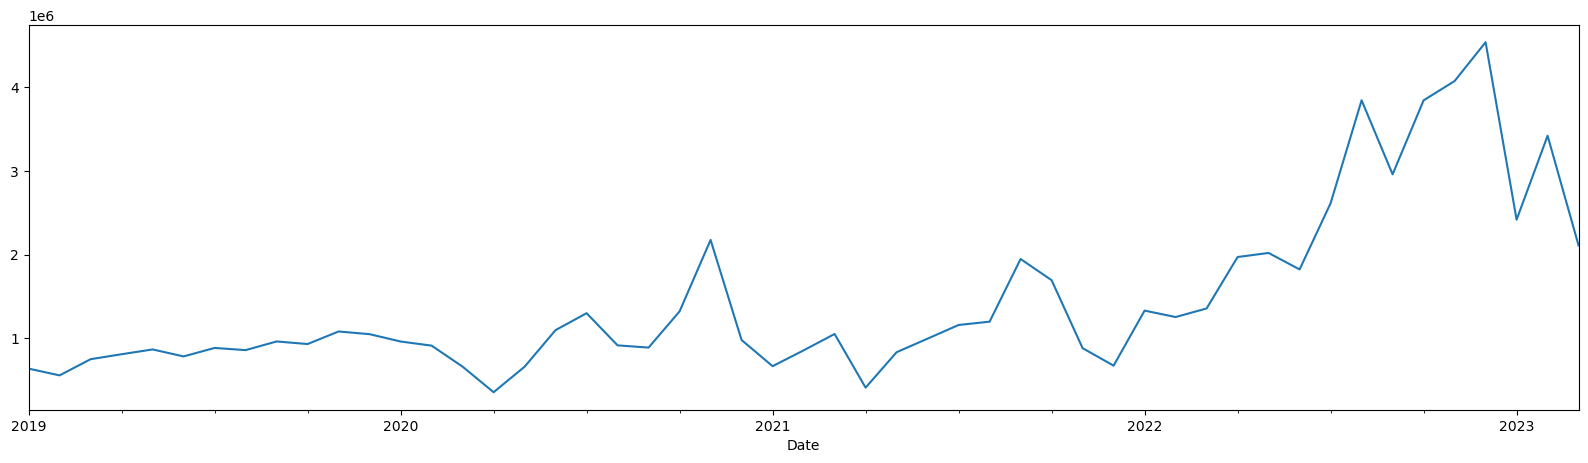

In [11]:
df1.plot(figsize=(20, 5))

<Axes: xlabel='Date'>

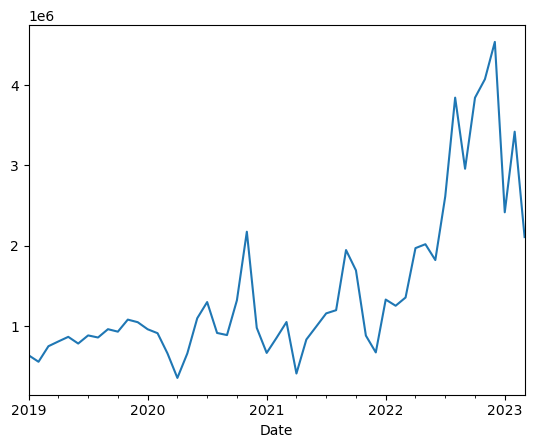

In [12]:
df1.plot()

Overall trend: The graph shows an upward trend in monthly sales over the years, with sales increasing from around 2 million in 2019 to over 4 million in 2023.

Seasonal variation: There is a clear seasonal variation in sales, with sales peaking in the fourth quarter of each year and declining in the first quarter. This is likely due to factors such as holiday shopping and back-to-school sales.

Year-over-year growth: The graph shows that year-over-year growth in sales has been relatively consistent over the past few years, with sales growing by an average of around 10% each year.


In [13]:
import statsmodels.api as sm

<Figure size 1000x1000 with 0 Axes>

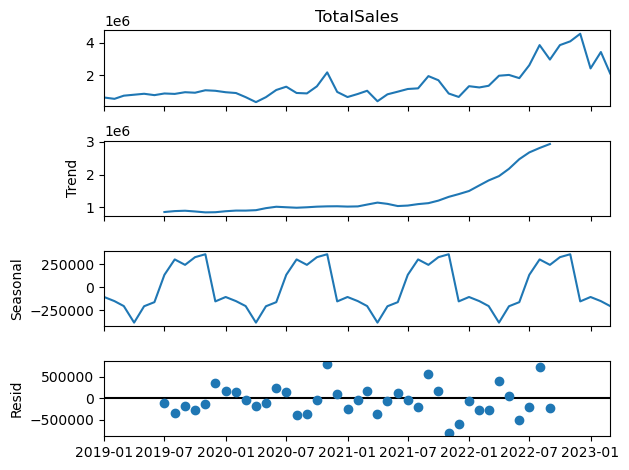

In [14]:
plt.figure(figsize=(10, 10))
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

by year 2023, sales are rapidly increasing, this might be due to introduction of new markets and 
increased marketing and advertising.

## Model Identification

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df1)

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [22]:
adfuller_test(df1)

ADF Test Statistic : 0.1347694970197553
p-value : 0.9683563460999173
#Lags Used : 8
Number of Observations Used : 42
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


When working with ARIMA, stationarity is a very important concept. This is because the ARIMA
model cannot forecast non‐stationary data. Thus it is important to determine the number of differences
required to make the data stationary.

In [23]:
#Differencing
df1_diff= df1.diff().dropna()
print(df1_diff)

Date
2019-02-01   -8.110763e+04
2019-03-01    1.936762e+05
2019-04-01    5.920298e+04
2019-05-01    5.744390e+04
2019-06-01   -8.346002e+04
2019-07-01    1.013189e+05
2019-08-01   -2.603348e+04
2019-09-01    1.035269e+05
2019-10-01   -3.078151e+04
2019-11-01    1.500709e+05
2019-12-01   -3.210126e+04
2020-01-01   -8.785239e+04
2020-02-01   -4.919286e+04
2020-03-01   -2.513859e+05
2020-04-01   -3.056366e+05
2020-05-01    3.050242e+05
2020-06-01    4.379958e+05
2020-07-01    2.017166e+05
2020-08-01   -3.847210e+05
2020-09-01   -2.624613e+04
2020-10-01    4.331035e+05
2020-11-01    8.538168e+05
2020-12-01   -1.196780e+06
2021-01-01   -3.124457e+05
2021-02-01    1.888889e+05
2021-03-01    1.958712e+05
2021-04-01   -6.414447e+05
2021-05-01    4.235582e+05
2021-06-01    1.621715e+05
2021-07-01    1.633012e+05
2021-08-01    3.972118e+04
2021-09-01    7.489167e+05
2021-10-01   -2.530137e+05
2021-11-01   -8.124522e+05
2021-12-01   -2.094567e+05
2022-01-01    6.582230e+05
2022-02-01   -7.692638e

In [24]:
df1_diff = df1-df1.shift(1)

In [25]:
df1=df1_diff.dropna()

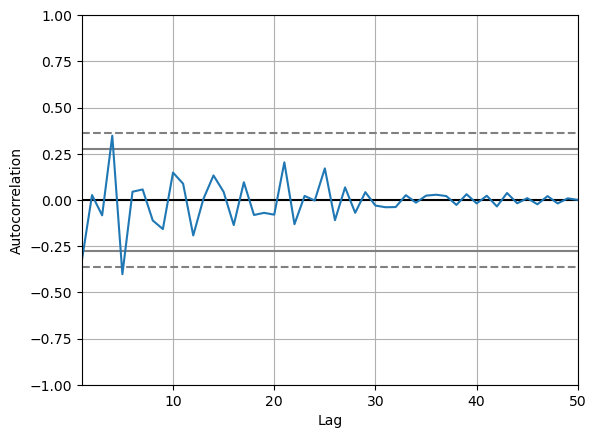

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1)
plt.show()

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

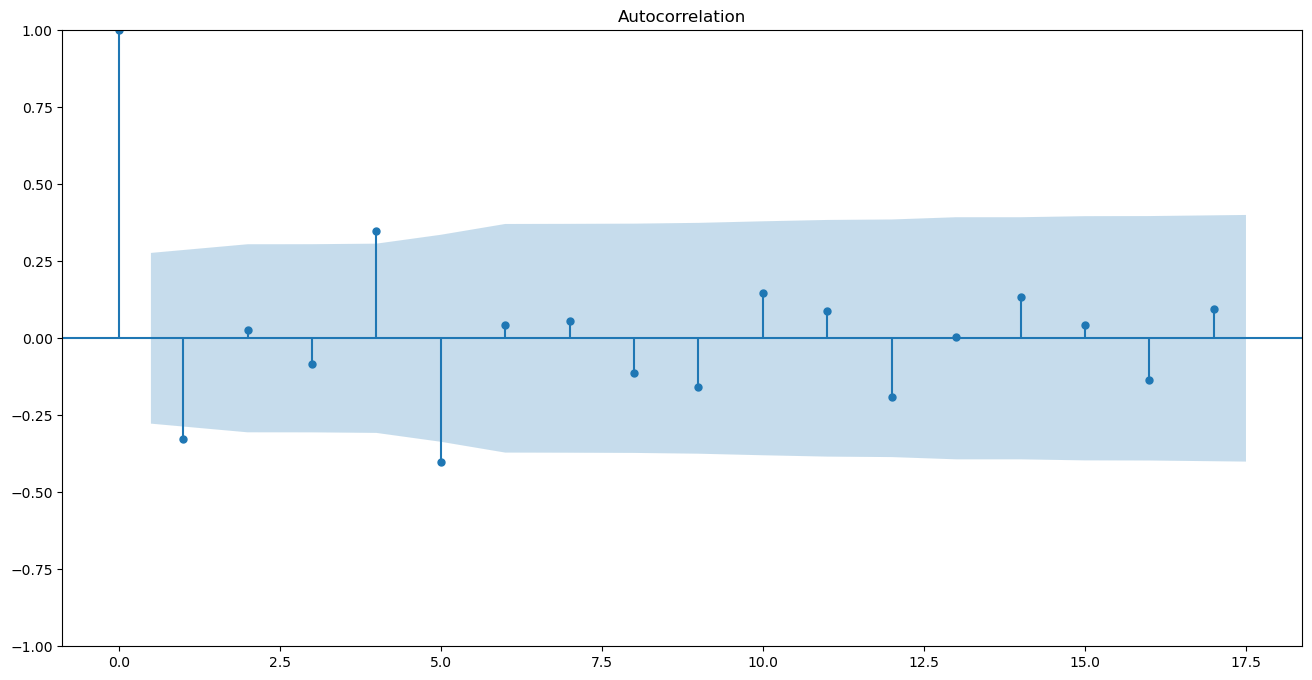

In [33]:
#plotting ACF

plot_acf(df1)
plt.gcf().set_size_inches(16, 8)

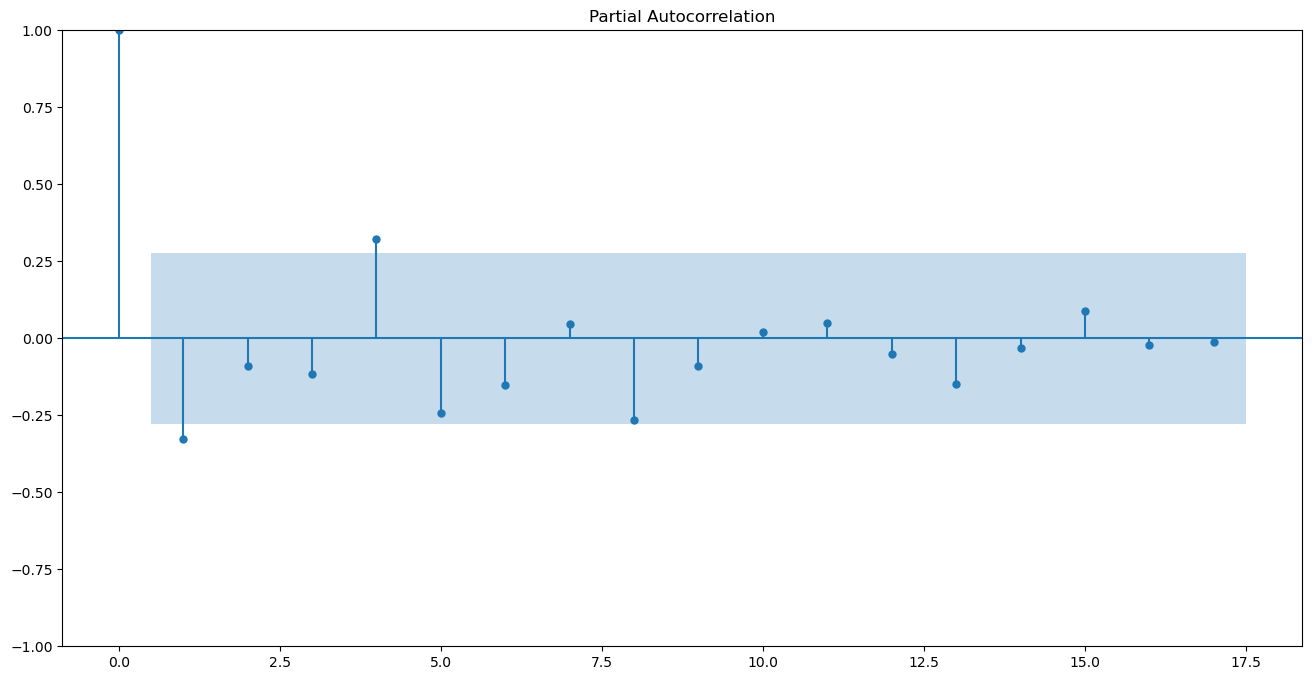

In [34]:
#Plotting PACF

plot_pacf(df1, method='ywm')
plt.gcf().set_size_inches(16, 8)

In [35]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [37]:
stepwise_fit=auto_arima(df1, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1472.363, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1474.304, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1470.095, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1469.838, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1472.429, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1471.736, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1473.497, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1471.509, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1468.323, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1470.241, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1471.958, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1468.503, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1469.979, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 0.144 seconds


## Model Estimation

In [39]:
# Split the data into training and testing sets.
train_size = int(len(df1) * 0.8)
train_data = df1.iloc[:train_size]
test_data = df1.iloc[train_size:]
print(train_data.shape, test_data.shape)

(40,) (10,)


In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
model = ARIMA(df1, order=(0,0,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             TotalSales   No. Observations:                   50
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -731.865
Date:                Tue, 31 Oct 2023   AIC                           1469.729
Time:                        22:04:12   BIC                           1475.465
Sample:                    02-01-2019   HQIC                          1471.914
                         - 03-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.944e+04   6.36e+04      0.463      0.644   -9.53e+04    1.54e+05
ma.L1         -0.3877      0.151     -2.567      0.010      -0.684      -0.092
sigma2      3.256e+11      0.014   2.28e+13      0.000    3.26e+11    3.26e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                16.28
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              17.37   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.75e+29. Standard errors may be unstable.
"""

In [44]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred=model.predict(start=start, end=end, typ='levels')
print(pred)

Date
2022-06-01    -71493.309652
2022-07-01     78144.048815
2022-08-01   -247062.473175
2022-09-01   -543742.651288
2022-10-01    161910.366939
2022-11-01   -250731.277328
2022-12-01   -157159.027273
2023-01-01   -211555.047834
2023-02-01    770072.443111
2023-03-01    -61171.924752
Freq: MS, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

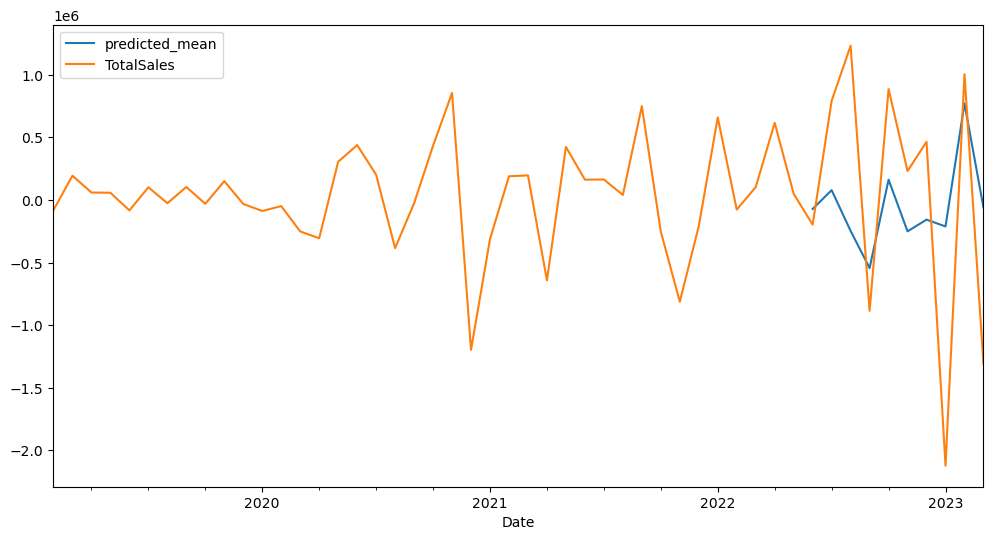

In [46]:
plt.figure(figsize=(12, 6))
pred.plot(legend=True)
df1.plot(legend=True)

## Model Evaluation

In [47]:
import numpy as np

actual = test_data.values
predicted = pred.values

mae = np.mean(np.abs(actual - predicted))

print("MAE:", mae)


MAE: 787901.1794107535


In [48]:
import numpy as np

actual = test_data.values
predicted = pred.values

rmse = np.sqrt(np.mean((actual - predicted)**2))

print("RMSE:", rmse)

RMSE: 960990.2130542356


In [50]:
df1.max()-df1.min()

3352934.2392949997

## Model Forecasting

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.46436D+01    |proj g|=  2.06902D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   1.911D-07   1.464D+01
  F =   14.643234024224164     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


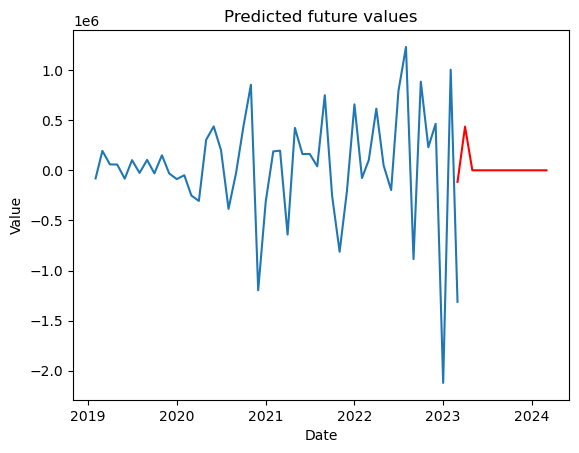

In [59]:
# Fit an ARIMA model to the data
model = SARIMAX(df1, order=(0,0,1))
model_fit = model.fit()

# Specify the time period for which you want to make predictions
start = '2023-03-01'
end = '2024-03-01'

# Make the predictions
pred = model_fit.predict(start=start, end=end, typ='levels')

# Plot the data
plt.plot(df1)

# Plot the predictions
plt.plot(pred.index, pred, color='red')

# Set the labels
plt.xlabel('Date')
plt.ylabel('Value')

# Set the title
plt.title('Predicted future values')

# Show the plot
plt.show()